# Speed Dating

## Challenge description

We will start a new data visualization and exploration project. Your goal will be to try to understand *love*! It's a very complicated subject so we've simplified it. Your goal is going to be to understand what happens during a speed dating and especially to understand what will influence the obtaining of a **second date**.

This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

Take some time to read the description of the challenge and try to understand each of the variables in the dataset. Help yourself with this from the document : *Speed Dating - Variable Description.md*

### Rendering

To be successful in this project, you will need to do a descriptive analysis of the main factors that influence getting a second appointment. 

Over the next few days, you'll learn how to use python libraries like seaborn, plotly and bokeh to produce data visualizations that highlight relevant facts about the dataset.

For today, you can start exploring the dataset with pandas to extract some statistics.

In [2]:
####
# Base imports
#######
import pandas as pd
import numpy as np
####
# graphical lib imports
#######
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots

from IPython.display import display

pd.options.display.max_columns = None
pd.options.display.max_rows = None

###
# Load & Explore
########
dataset = pd.read_csv(r'Speed Dating Data.csv', encoding='ISO-8859-1') 
print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)

Basics statistics: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

<AxesSubplot:>

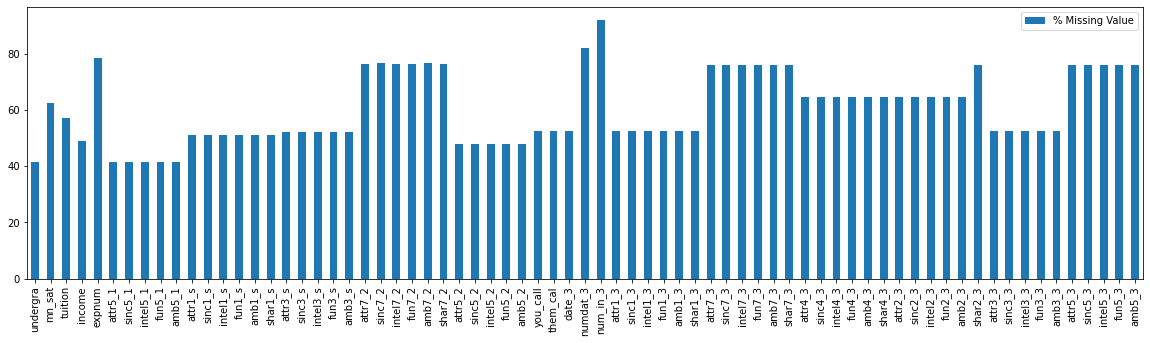

In [121]:
#dt_stats = pd.DataFrame(100*dataset.isnull().sum()/dataset.shape[0], columns=['col', 'missing'])
dt_stats = (100*dataset.isnull().sum()/dataset.shape[0]).to_frame('% Missing Value')
dt_stats = dt_stats[dt_stats['% Missing Value']>40]
dt_stats.plot.bar(figsize=(20,5))

In [5]:
###
# Let's see the baseline match/no match
#######
(dataset['match'].value_counts()/dataset.shape[0])*100

0    83.528288
1    16.471712
Name: match, dtype: float64

In [3]:
##############
# we remove people which have attented to several speed dating session
###########
dt_population = dataset.drop_duplicates('iid').copy()
dt_population.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
10,2,2.0,0,3,1,1,10,3,NaN,10,1,11.0,0,0.29,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,8.0,7.0,6.0,9.0,7.0,4.0,7.0,2.0,2.0,24.0,law,1.0,NaN,NaN,NaN,2.0,2.0,5.0,Alabama,"35,223","65,929.00",1.0,5.0,1.0,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,45.0,5.0,25.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,10.0,25.0,0.0,0.0,7.0,5.0,10.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN,0,5.0,7.0,8.0,4.0,6.0,3.0,6.0,4.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.92,18.92,21.62,27.03,5.41,8.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,8.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,30.0,5.0,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN
20,3,3.0,0,5,1,1,10,9,NaN,6,1,11.0,0,-0.24,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,7.0,8.0,6.0,5.0,8.0,4.0,5.0,2.0,1.0,25.0,Economics,2.0,NaN,NaN,NaN,2.0,8.0,4.0,Connecticut,"6,268",NaN,6.0,3.0,1.0,Economist,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,35.0,10.0,35.0,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0.0,20.0,30.0,0.0,0.0,8.0,9.0,8.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN,0,7.0,9.0,10.0,7.0,8.0,9.0,8.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,4,4.0,0,7,1,1,10,6,NaN,3,1,11.0,0,-0.18,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,7.0,8.0,7.0,7.0,5.0,6.0,3.0,2.0,23.0,Law,1.

In [4]:
# ###
# Let's cleanup the dataset for 
# remove na, labelized coded field for futher use
######
dt_population = dt_population.dropna(subset = ['gender', 'age', 'race', 'field_cd'])

# gender
dt_population.loc[(dt_population['gender']==1),'gender'] = 'Male'
dt_population.loc[(dt_population['gender']==0),'gender'] = 'Female'

# race
num_race = [1,2,3,4,5,6]
nam_race = ['Black', 'European', 'Latino', 'Asian', 'Native', 'Other']
for i in range(len(num_race)):
    dt_population.loc[dt_population['race'] == num_race[i], 'race'] = nam_race[i]

# field of occupation
num_field=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
nom_field=['Law', 'Math', 'Social', 'Medical', 'Engineering',  'English', 'History', 
'Business', 'Education', 'BPC', # Biology, Physics, Chemistry (education)
'Social Work', 'Undergrad', 'Political','Film','Arts','Languages','Architecture','Other']
for i in range(len(num_field)):
    dt_population.loc[dt_population['field_cd'] == num_field[i], 'field_cd'] = nom_field[i]
    

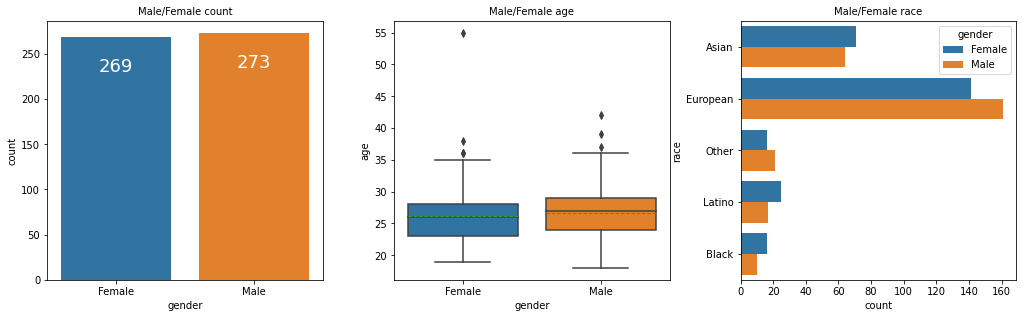

In [5]:
###
# Let's have an overview of the population
########
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)
fig.tight_layout(pad=4.0)

ax[0].set_title('Male/Female count', fontsize=10)
sns.countplot(data=dt_population, x = 'gender', ax=ax[0])
ax[0].set_title('Male/Female count', fontsize=10)
for p in ax[0].patches:
    ax[0].annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=18)

ax[1].set_title('Male/Female age', fontsize=10)
sns.boxplot(data=dt_population, x='gender', y='age', meanline=True, showmeans = True, ax=ax[1])

ax[2].set_title('Male/Female race', fontsize=10)
sns.countplot(data=dt_population, y='race', hue='gender', orient="h", ax=ax[2])

plt.show()

We have a quiet even split between male and female, age distribtion is slightly above 25, moslty European American, and Asian american as expected in the east of the US.

In [6]:
#####
# let's have a peek of field of occupation by gender
############
fig = make_subplots(rows=1, cols=2, 
     specs=[[{"type": "pie"}, {"type": "pie"}]], 
     y_title='Field of occupation', 
     horizontal_spacing=0, 
     vertical_spacing=0)

field_of_occpupation_male = dt_population.loc[(dt_population['gender']=="Male"), 'field_cd'].value_counts()
field_of_occpupation_female = dt_population.loc[(dt_population['gender']=="Female"), 'field_cd'].value_counts()

fig.add_trace(go.Pie(
     values=field_of_occpupation_male.values,
     labels=field_of_occpupation_male.index,
     title="Men"), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=field_of_occpupation_female.values,
     labels=field_of_occpupation_female.index,
     title="Women"), 
     row=1, col=2)

fig.update_layout(
    autosize=False,
    width=800,
    height=400,)

fig.show()

Mostly men in business and engineering, Women mostly in education, social work and such.
A good split in BPC (biology, Physics and Chemistry)

In [7]:
interest = ['sports', 'tvsports', 'exercise', 'dining', 
'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 
'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga'
]
dt_population = dt_population.dropna(subset = interest)

In [9]:
interest_male = {}
interest_female = {}
for i in range(len(interest)):
    try :
        interest_male[interest[i]] = dt_population.loc[(dt_population['gender']=='Male'),interest[i]].mean()
        interest_female[interest[i]] = dt_population.loc[(dt_population['gender']=='Female'),interest[i]].mean()
    except KeyError:
        pass

fig = make_subplots(rows=1, cols=1, 
     specs=[[{"type": "polar"}]], 
     x_title='Hobies / Interrests', 
     horizontal_spacing=0, 
     vertical_spacing=0)

fig.add_trace(go.Scatterpolar(r=list(interest_male.values()), theta=list(interest_male.keys()), fill='toself', name='Male'),row=1,col=1)
fig.add_trace(go.Scatterpolar(r=list(interest_female.values()), theta=list(interest_female.keys()), fill='toself', name='Female'),row=1,col=1)

fig.update_layout(
    autosize=False,
    width=500,
    height=400,)

fig.show()

Women in yoga, shopping and theater and other cultural hobbies
Mem moslty in gaming, tvsports, and sport

We want to know what you look for in the opposite sex. 
Waves 6-9: Please rate the importance of the following attributes in a potential date on a scale of 1-10 (1=not at all important, 10=extremely important):
Waves 1-5, 10-21: You have 100 points to distribute among the following attributes -- give more points to those attributes that are more important in a potential date, and fewer points to those attributes that are less important in a potential date.  Total points must equal 100.

In [10]:
look_for_key = ['iid', 'attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']

opposite_look_for_key = ['iid', 'attr2_1','sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1']

label = ['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared hobbies']
# Let's split the dataset female/male
ds_female = dataset.loc[dataset['gender']==0]
ds_male = dataset.loc[dataset['gender']==1]

# Let's split the dataset female/male
ds_female_match = ds_female.loc[dataset['match']==1]
ds_male_match = ds_male.loc[dataset['match']==1]

ds_female_nomatch = ds_female.loc[dataset['match']==0]
ds_male_nomatch = ds_male.loc[dataset['match']==0]

In [12]:
stats_1_1 = []
for ds in [ds_female_match, ds_male_match, ds_female_nomatch, ds_male_nomatch]:
    ds_10pt = ds.loc[dataset['wave'].isin([6,7,8,9])]
    ds_100 = ds.loc[~dataset['wave'].isin([6,7,8,9])]    
    stats_d10 = ds_10pt[look_for_key].groupby('iid').mean().mean()
    stats_d100 = ds_100[look_for_key].groupby('iid').mean().mean()
    stats_1_1.append(((stats_d10+stats_d100)/2))
    
fig = make_subplots(rows=1, cols=2, 
     specs=[[{"type": "polar"},{"type": "polar"}]], 
     x_title='What people are looking for',
     subplot_titles = ['Match', 'No Match'],
     horizontal_spacing=0, 
     vertical_spacing=0)

fig.add_trace(go.Scatterpolar(r=stats_1_1[0].to_list(), theta=label, fill='toself', name='Female'),row=1,col=1)
fig.add_trace(go.Scatterpolar(r=stats_1_1[1].to_list(), theta=label, fill='toself', name='Male'),row=1,col=1)

fig.add_trace(go.Scatterpolar(r=stats_1_1[2].to_list(), theta=label, fill='toself', name='Female'),row=1,col=2)
fig.add_trace(go.Scatterpolar(r=stats_1_1[3].to_list(), theta=label, fill='toself', name='Male'),row=1,col=2)
fig.show()

In [13]:
stats_1_1 = []
for ds in [ds_female_match, ds_male_match, ds_female_nomatch, ds_male_nomatch]:
    ds_10pt = ds.loc[dataset['wave'].isin([6,7,8,9])]
    ds_100 = ds.loc[~dataset['wave'].isin([6,7,8,9])]    
    stats_d10 = ds_10pt[opposite_look_for_key].groupby('iid').mean().mean()
    stats_d100 = ds_100[opposite_look_for_key].groupby('iid').mean().mean()
    stats_1_1.append(((stats_d10+stats_d100)/2))

fig = make_subplots(rows=1, cols=2, 
     specs=[[{"type": "polar"},{"type": "polar"}]],
     subplot_titles = ['Match', 'No Match'],
     x_title='What the opposite sex is looking for', 
     horizontal_spacing=0, 
     vertical_spacing=0)

fig.add_trace(go.Scatterpolar(r=stats_1_1[0].to_list(), theta=label, fill='toself', name='Female'),row=1,col=1)
fig.add_trace(go.Scatterpolar(r=stats_1_1[1].to_list(), theta=label, fill='toself', name='Male'),row=1,col=1)

fig.add_trace(go.Scatterpolar(r=stats_1_1[2].to_list(), theta=label, fill='toself', name='Female'),row=1,col=2)
fig.add_trace(go.Scatterpolar(r=stats_1_1[3].to_list(), theta=label, fill='toself', name='Male'),row=1,col=2)
fig.show()

In [14]:
###
# Let's see the baseline match/no match only 16%
#######
(dataset['match'].value_counts()/dataset.shape[0])*100

0    83.528288
1    16.471712
Name: match, dtype: float64

In [116]:
ds_male_match['date_3'].value_counts()/ds_male_match['date_3'].count()

0.0    0.519481
1.0    0.480519
Name: date_3, dtype: float64

In [118]:
ds_female_match['date_3'].value_counts()/ds_female_match['date_3'].count()

1.0    0.534177
0.0    0.465823
Name: date_3, dtype: float64

In [119]:
ds_male_match['you_call'].value_counts()/ds_male_match['you_call'].count()

0.0     0.288961
1.0     0.272727
2.0     0.194805
4.0     0.077922
3.0     0.071429
5.0     0.042208
8.0     0.025974
6.0     0.019481
21.0    0.006494
Name: you_call, dtype: float64

In [120]:
ds_female_match['you_call'].value_counts()/ds_female_match['you_call'].count()

0.0    0.759494
1.0    0.121519
2.0    0.083544
6.0    0.017722
4.0    0.010127
3.0    0.007595
Name: you_call, dtype: float64

In [128]:
ds_male_match[ds_male_match['you_call']==21]

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
4935,332,1.0,1,2,1,13,10,5,5.0,2,2,323.0,1,0.33,1,25.0,4.0,10.0,20.0,20.0,20.0,10.0,20.0,1,6.0,7.0,8.0,8.0,6.0,6.0,6.0,7.0,2.0,30.0,anthropology,3.0,university of wisconsin/la crosse,NaN,"3,730.00",4.0,1.0,1.0,japan,NaN,NaN,3.0,7.0,4.0,medical examiner or researcher,2.0,7.0,2.0,8.0,5.0,10.0,10.0,7.0,3.0,7.0,9.0,5.0,8.0,10.0,5.0,9.0,7.0,1.0,7.0,NaN,60.0,10.0,10.0,10.0,5.0,5.0,50.0,10.0,5.0,20.0,5.0,10.0,50.0,5.0,5.0,30.0,5.0,5.0,5.0,10.0,6.0,6.0,10.0,4.0,6.0,4.0,3.0,8.0,1,8.0,10.0,9.0,7.0,8.0,8.0,8.0,7.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,5.0,5.0,30.0,10.0,0.0,60.0,10.0,5.0,10.0,5.0,10.0,40.0,5.0,10.0,30.0,10.0,5.0,6.0,8.0,7.0,9.0,9.0,5.0,8.0,7.0,6.0,8.0,21.0,1.0,1.0,1.0,NaN,60.0,10.0,5.0,10.0,10.0,5.0,60.0,10.0,5.0,10.0,10.0,5.0,50.0,5.0,15.0,20.0,10.0,0.0,60.0,0.0,10.0,40.0,10.0,0.0,5.0,10.0,7.0,7.0,10.0,5.0,9.0,6.0,5.0,10.0
4936,332,1.0,1,2,1,13,10,4,4.0,1,3,324.0,1,0.04,0,23.0,2.0,40.0,10.0,15.0,20.0,10.0,5.0,1,1.0,10.0,10.0,6.0,5.0,1.0,3.0,5.0,2.0,30.0,anthropology,3.0,university of wisconsin/la crosse,NaN,"3,730.00",4.0,1.0,1.0,japan,NaN,NaN,3.0,7.0,4.0,medical examiner or researcher,2.0,7.0,2.0,8.0,5.0,10.0,10.0,7.0,3.0,7.0,9.0,5.0,8.0,10.0,5.0,9.0,7.0,1.0,7.0,NaN,60.0,10.0,10.0,10.0,5.0,5.0,50.0,10.0,5.0,20.0,5.0,10.0,50.0,5.0,5.0,30.0,5.0,5.0,5.0,10.0,6.0,6.0,10.0,4.0,6.0,4.0,3.0,8.0,1,10.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,5.0,5.0,30.0,10.0,0.0,60.0,10.0,5.0,10.0,5.0,10.0,40.0,5.0,10.0,30.0,10.0,5.0,6.0,8.0,7.0,9.0,9.0,5.0,8.0,7.0,6.0,8.0,21.0,1.0,1.0,1.0,NaN,60.0,10.0,5.0,10.0,10.0,5.0,60.0,10.0,5.0,10.0,10.0,5.0,50.0,5.0,15.0,20.0,10.0,0.0,60.0,0.0,10.0,40.0,10.0,0.0,5.0,10.0,7.0,7.0,10.0,5.0,9.0,6.0,5.0,10.0


In [17]:
ds_male_match[ds_male_match['you_call']==21]['date_3']

4935    1.0
4936    1.0
Name: date_3, dtype: float64